# Project 2 : :)
## Authors: Frederick Nilsen, Mia Rødde, Sara Abnar

### Warnings

* Ikke endre uten at de andre vet det
* **Alltid** gå på Kernel -> Restart & Clear Output
* Ikke skriv utenfor cellene og sånn

## Implementation of set 1 - points in 2D

In [133]:
## IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import loader
import plotting
from spirals import get_data_spiral_2d

In [134]:
## GLOBAL CONSTS AND DEFINITIONS

sigma = lambda x : np.tanh(x)         # Activation function
eta = lambda x : 0.5*(1+np.tanh(x/2)) # Scalar function     
#sech = lambda x : 1/np.cosh(x)
eta_ddx = lambda x :  0.25*(1-np.tanh(x/2)*np.tanh(x/2)) # Derivative of eta
sigma_ddx = lambda x: 1-(np.tanh(x))**2 # Derivative of sigma


K = 10 # +1 gives number of layers, arbitrary number
d = 2 # Ehh
tau = 0.1 # learning parameter [0.01,0.1]
Y0, C = get_data_spiral_2d(200) #Default n=200
C_colors = getColorFromLabel(C)
I = Y0.shape[1]
One = np.full((I,2),1)
W, b = np.random.randn(K,d,d), np.random.randn(K,d,1)     #startverdier
mu = 1 #?
w = np.random.randn(d,1)
h = 0.1

#U_i = [W, b, w, mu]

In [135]:
## INITIALISATION CELL

def getColorFromLabel(C):
    colorLst = []
    for el in C:
        if el:
            colorLst.append('r')
        else:
            colorLst.append('b')
    return colorLst

#optimert funksjon
def YK(W, b, Ystart=Y0):
    #tom Y-matrise, 3-dimensjonalt numpy-array
    Ym = np.zeros((K+1,d,I))
    Ym[0,:,:] = np.copy(Ystart)
    k=0
    while k < K:
        Ym[k+1] = Ym[k] + h*sigma(W[k]@Ym[k] + b[k])
        k+=1
    return Ym



#Finner P_K
def getGradients(K, W,b,w,mu):
    Y_all = YK(W,b)
    lastY = Y_all[-1,:,:]
    P = np.zeros((Y_all.shape)) # init matrix
    P[K,:,:] = w@np.transpose((Z(w,mu)-C)*eta_ddx(np.transpose(lastY)@w+mu))  #(7)
    #print("PK", P[K,:,:])
    
    dJdMU = eta_ddx(np.transpose(np.transpose(lastY)@w+mu))@(Z(w,mu)-C)   #(5), kunne også brukt .T for transpose
    dJdw = lastY@((Z(w,mu)-C)*eta_ddx(np.transpose(lastY)@w+mu))              #(6)
    for k in range(K,0,-1):

        #print(np.transpose(W[k-1,:,:])@(sigma_ddx(W[k-1,:,:]@Y_all[k-1,:,:]+b[k-1,:,:])*P[k]))
        P[k-1,:,:] = P[k,:,:]+h*np.transpose(W[k-1,:,:])@(sigma_ddx(W[k-1,:,:]@Y_all[k-1,:,:]+b[k-1,:,:])*P[k])  #(8) 
    #print(P)
    dJdWk = np.zeros((K,d,d))
    dJdBk = np.zeros((K,d,1))
    
    for k in range(0,K):
        dJdWk[k] = h*(P[k+1]*sigma_ddx(W[k,:,:]@Y_all[k,:,:]+b[k,:,:]))@np.transpose(Y_all[k,:,:])  #(9)
        dJdBk[k] = h*(P[k+1]*sigma_ddx(W[k,:,:]@Y_all[k,:,:]+b[k,:,:]))@np.ones((I,1)) #One not needed?#(10)
    return dJdWk, dJdBk, dJdw, dJdMU


#Adam descent algorithn
def AdamAlg(uParam, U_ind, lastM, lastV):
    beta1 = 0.9
    beta2 = 0.999
    alpha = 0.01
    epsilon = 1e-8
    g = getGradients(K, W,b,w,mu)[U_ind]
    m = beta1*lastM+(1-beta1)*g
    v = beta2*lastV+(1-beta2)*(g*g)
    mhat = m/(1-beta1**(counter)) # NB må altså :)
    vhat = v/(1-beta2**(counter))
    uParam -= alpha*mhat/(np.sqrt(vhat)+epsilon)
    lastM = m
    lastV = v
    return uParam, lastM, lastV

In [136]:
#Lager siste Y_k = Y_K
YK_list = YK(W,b)
lastY = YK_list[K]

Z = lambda w,mu,finalY=lastY : eta(np.transpose(finalY)@w +mu)
#print(":)))")
Jf = lambda Z=Z(w,mu), ce=C : 1/2*np.linalg.norm(Z-ce)**2 # Cost function
J = Jf()

In [ ]:
# Algorithm
converged = False
counter = 1

#initializing list
thisMW = thisVW = 0
thisMb = thisVb = 0
thisMw = thisVw = 0
thisMmu = thisVmu = 0


#for AdamAlg

for i in range(1,10001):   #Skal være 40001
    W, thisMW, thisVW = AdamAlg(W, 0, thisMW, thisVW)
    b, thisMb, thisVb = AdamAlg(b, 1, thisMb, thisVb)
    w, thisMw, thisVw = AdamAlg(w, 2, thisMw, thisVw)
    mu, thisMmu, thisVmu = AdamAlg(mu, 3, thisMmu, thisVmu)
    counter +=1 


In [137]:
K = 10 # +1 gives number of layers, arbitrary number
d = 2 # Ehh
tau = 0.1 # learning parameter [0.01,0.1]
Y0, C = get_data_spiral_2d(200) #Default n=200
C_colors = getColorFromLabel(C)
I = Y0.shape[1]
One = np.full((I,2),1)

np.random.seed(0)
W = np.random.randn(K,d,d)
np.random.seed(0)
b = np.random.randn(K,d,1)     #startverdier
np.random.seed(0)
mu = np.random.randn()
np.random.seed(0)
w = np.random.randn(d,1)
h = 0.1




counter = 1
for i in range(1,5000):   #Skal være 40001
    #print(YK_list)
    dJdWk, dJdBk, dJdw, dJdMU = getGradients(K, W,b,w,mu)
    W-=tau*dJdWk
    b-=tau*dJdBk
    w-=tau*dJdw
    mu-=tau*dJdMU
    #print("riktig", mu)
    #print(Jf(Z(w,mu)))
    counter = i 


30.928231609431258


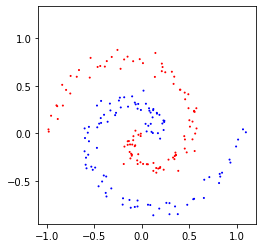

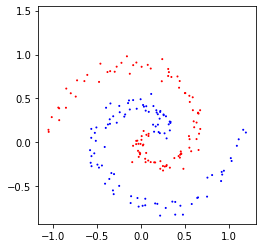

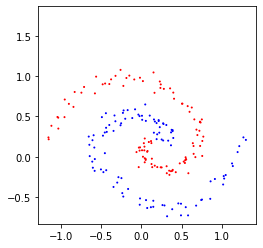

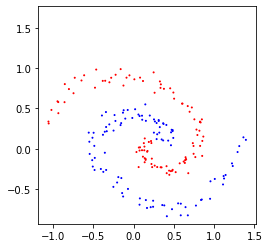

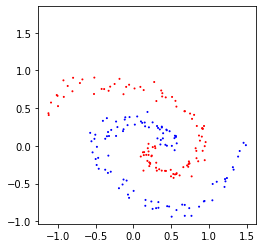

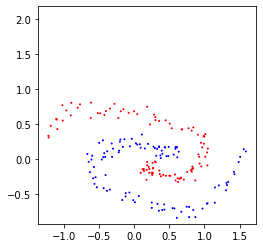

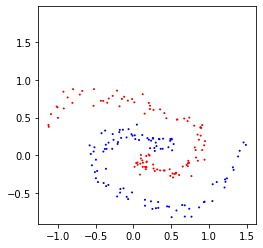

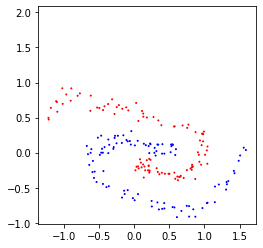

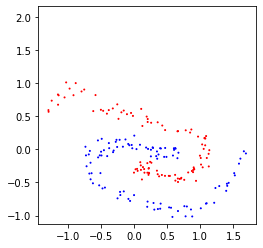

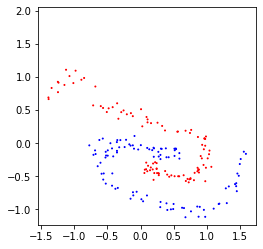

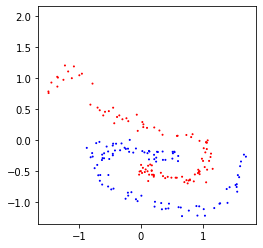

In [141]:
from plotting import *

print(Jf())
testY, testC = get_data_spiral_2d(200)
trainedY = YK(W, b, testY)
#lastY = trainedY[K,:,:]
#trainedZ = Z(w,mu,lastY)

plot_progression(trainedY, getColorFromLabel(testC))

In [ ]:
oldW, oldb = np.random.randn(K,d,d), np.random.randn(K,d,1)
oldw = np.random.randn(d,1)
oldmu = 1

#print("W:", W-oldW)
#print("b:", b-oldb)
#print("w", w-oldw)
#print("mu", mu-oldmu)
from plotting import *

def checkResults(n=I):
    testY, testC = get_data_spiral_2d(n)
    trainedY = YK(W, b, testY)
    lastY = trainedY[K-1,:,:]
    trainedZ = Z(w,mu,lastY)

    J_new=Jf(trainedZ,testC)
    numTrue=0
    numJTrue = 0
    print(J_new)
    for i in range(n):
        if testC[i][0]:
            numTrue+=1
        #print("Z-val: ", trainedZ[i][0])
        if trainedZ[i][0] >= 0.5:
            numJTrue+=1
    print("Antall true:", numTrue)
    print("Ifølge J:", numJTrue)
    print("Andel riktige, ", numJTrue/numTrue*100, "%", sep="")
    
testY, testC = get_data_spiral_2d(400)
trainedY = YK(W, b, testY)
lastY = trainedY[K-1,:,:]
trainedZ = Z(w,mu,lastY)

trainedY = YK(W, b, testY)
plot_progression(trainedY, getColorFromLabel(testC))


In [ ]:


for k in range(K):
    plot_model(int_list, YK_list[k], C, I)



In [ ]:
load_mnist()